In [95]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


/home/spark/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [96]:
import snap
import networkx

In [97]:
labels=pd.read_csv('../input/training_variants',index_col=0)['Class'].to_dict()

In [98]:
df =pd.read_csv('edges_pagelen.txt',header=None)

In [99]:
df.columns=['rawsrc','rawdest','w']
df.shape

(266949, 3)

In [100]:
df.head()

rawsrc rawdest     w
0  te5053  te4647  1468
1  te5053  tr1530  1468
2  te4647  tr1530  1468
3  te5553  te3523   247
4  te5553  te2568   247

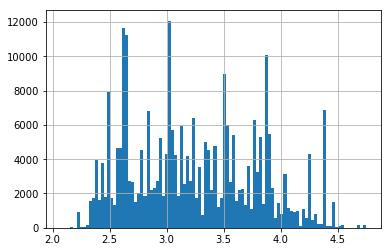

In [103]:
np.log10(df.w).hist(bins=100);

In [104]:
df['src']=df['rawsrc'].apply(lambda u:  int(u[2:])  if u[:2]=='te' else 10000+int(u[2:]))
df['dest']=df['rawdest'].apply(lambda u:  int(u[2:])  if u[:2]=='te' else 10000+int(u[2:]))

In [105]:
10**2.5

316.22776601683796

In [124]:
filtered_df=df[df.w>1000]

In [125]:
subdf=filtered_df.groupby(['rawsrc','rawdest']).count().reset_index()
subdf['src']=subdf['rawsrc'].apply(lambda u:  int(u[2:])  if u[:2]=='te' else 10000+int(u[2:]))
subdf['dest']=subdf['rawdest'].apply(lambda u:  int(u[2:])  if u[:2]=='te' else 10000+int(u[2:]))
subdf.shape

(47430, 5)

In [126]:
nodes=set(pd.concat([subdf['src'],subdf['dest']]))
len(nodes),len([u for u in nodes if u <10000]),len([u for u in nodes if u >10000])

(6487, 3407, 3079)

In [127]:
g=snap.TUNGraph.New()

In [128]:
for n in nodes:
    if True or n>10000:
        g.AddNode(n)

In [129]:
for row in subdf.values:
    w,u,v=row[2:]
    if w>0 :#and u>10000 and v >10000:
        g.AddEdge(u,v)

In [130]:
Components = snap.TCnComV()
#snap.GetWccs(g, Components)
snap.CommunityCNM(g,Components)
#snap.CommunityGirvanNewman(g,Components)

lst=[]
lst2=[]
for CnCom in Components:
    trainlabels=[nid for nid in CnCom if nid>=10000]
    testlabels=[nid for nid in CnCom if nid<10000]
    
    n1=len([_ for nid in CnCom if nid>=10000])
    cl=[labels[i-10000] for i in  CnCom if i>=10000]
    vc=pd.Series(cl).value_counts()
    vcc=vc.loc[range(1,10)].fillna(0)+1
    p= (vcc/vcc.sum()).tolist()
    lst2+=[[u]+p for u in CnCom]
    if vc.sum()>0: lst.append([CnCom.Len(), n1 ]+ p)
#pd.DataFrame(lst).sort_values(2)

In [131]:
def f(u):
    a=u[2:11]
    b=u[1]
    c=[v*np.log(v) for v in a]
    return np.sum(c)*b
pd.DataFrame(lst).apply(lambda u:f(u),axis=1).sum()/float(len([u for u in nodes if u >10000]))

-1.633519820067917

In [132]:
gg=lambda x: -x*np.log(x)-(1-x)*np.log(1./8-x/8)
a=pd.DataFrame(lst)
a['maxp']=np.max(a.values[:,2:11],1)
a['loss']=-a.apply(f,1)/a.loc[:,1]
a['aa']=np.round(a['maxp'].map(gg)-a['loss'],5)
a.sort_values('loss')

0    1         2         3         4         5         6         7  \
72   148  111  0.016667  0.008333  0.050000  0.875000  0.008333  0.008333   
211   30   28  0.027027  0.027027  0.027027  0.027027  0.027027  0.783784   
64    98   82  0.076923  0.010989  0.010989  0.032967  0.164835  0.670330   
30    34   29  0.078947  0.026316  0.026316  0.684211  0.026316  0.052632   
9    156   71  0.025000  0.187500  0.012500  0.037500  0.037500  0.050000   
17   352  164  0.057803  0.329480  0.052023  0.017341  0.028902  0.005780   
137   17   14  0.043478  0.043478  0.043478  0.043478  0.043478  0.652174   
26   197   92  0.029703  0.287129  0.009901  0.059406  0.039604  0.059406   
21   230  105  0.026316  0.342105  0.017544  0.043860  0.061404  0.043860   
13    50   34  0.046512  0.069767  0.255814  0.023256  0.023256  0.023256   
0    401  183  0.062500  0.229167  0.005208  0.083333  0.026042  0.083333   
42    23   13  0.045455  0.090909  0.045455  0.045455  0.045455  0.045455   
98    53   25  0.029412  0.323529  0.029412  0.029412  0.058824  0.029412   
57    85   45  0.407407  0.092593  0.018519  0.314815  0.018519  0.018519   
31   131   74  0.120482  0.060241  0.132530  0.060241  0.072289  0.012048   
295   26   25  0.117647  0.029412  0.029412  0.235294  0.029412  0.029412   
147   26   20  0.034483  0.034483  0.137931  0.034483  0.137931  0.034483   
32   290  232  0.244813  0.008299  0.066390  0.190871  0.360996  0.099585   
16   122   57  0.333333  0.030303  0.015152  0.363636  0.075758  0.106061   
196   12   11  0.550000  0.050000  0.050000  0.050000  0.100000  0.050000   
158   10    9  0.055556  0.055556  0.055556  0.555556  0.055556  0.055556   
19   357  209  0.344037  0.114679  0.018349  0.339450  0.045872  0.027523   
4    202   96  0.161905  0.047619  0.028571  0.419048  0.200000  0.104762   
18   104   40  0.061224  0.040816  0.061224  0.122449  0.061224  0.102041   
22   141   47  0.107143  0.357143  0.017857  0.250000  0.017857  0.017857   
5    204   70  0.240506  0.151899  0.037975  0.037975  0.025316  0.037975   
48    44   22  0.129032  0.064516  0.032258  0.032258  0.322581  0.032258   
15    60   15  0.458333  0.041667  0.041667  0.083333  0.083333  0.041667   
226   10    7  0.500000  0.062500  0.062500  0.062500  0.062500  0.062500   
309    7    7  0.062500  0.062500  0.062500  0.062500  0.062500  0.062500   
..   ...  ...       ...       ...       ...       ...       ...       ...   
184    4    1  0.200000  0.100000  0.100000  0.100000  0.100000  0.100000   
182    2    1  0.100000  0.100000  0.100000  0.100000  0.100000  0.100000   
149    2    1  0.100000  0.100000  0.100000  0.200000  0.100000  0.100000   
150    4    1  0.100000  0.100000  0.100000  0.200000  0.100000  0.100000   
151    4    1  0.100000  0.200000  0.100000  0.100000  0.100000  0.100000   
153    3    1  0.100000  0.100000  0.100000  0.100000  0.100000  0.100000   
154    2    1  0.100000  0.100000  0.100000  0.100000  0.200000  0.100000   
155    2    1  0.200000  0.100000  0.100000  0.100000  0.100000  0.100000   
36     3    1  0.100000  0.100000  0.100000  0.200000  0.100000  0.100000   
159    3    1  0.100000  0.100000  0.100000  0.100000  0.100000  0.200000   
160    3    1  0.100000  0.100000  0.100000  0.200000  0.100000  0.100000   
161    2    1  0.100000  0.100000  0.100000  0.200000  0.100000  0.100000   
162    2    1  0.100000  0.100000  0.100000  0.100000  0.100000  0.100000   
164    3    1  0.100000  0.200000  0.100000  0.100000  0.100000  0.100000   
232    3    1  0.100000  0.100000  0.100000  0.100000  0.100000  0.100000   
166    2    1  0.100000  0.100000  0.100000  0.200000  0.100000  0.100000   
168    4    1  0.100000  0.100000  0.200000  0.100000  0.100000  0.100000   
169    6    1  0.100000  0.100000  0.100000  0.100000  0.100000  0.100000   
170    5    1  0.100000  0.100000  0.100000  0.200000  0.100000  0.100000   
171    3    1  0.100000  0.200000  0.100000  0.100000  0.100000  0.100000   
173

In [83]:
df=pd.DataFrame(lst2,columns=['ID']+["wlong_"+str(i) for i in range(1,10)])
df.index=df['ID']
df=df.drop("ID",1)

In [84]:
newtrain=df[df.index>=10000].sort_index()
newtrain.index=newtrain.index-10000
newtest=df[df.index<10000].sort_index()

In [85]:
newtrain.to_csv("../input/newtrain_wlongp.csv")
newtest.to_csv("../input/newtest_wlongp.csv")

In [89]:
a=pd.read_csv('../input/newtrain_w30p.csv',index_col=0)
a.columns=newtrain.columns

In [91]:
newtrain.shape,a.shape

((3172, 9), (2814, 9))

In [92]:
(newtrain-a).dropna().shape

(2702, 9)

In [94]:
np.round((newtrain-a).dropna(),5)

wlong_1  wlong_2  wlong_3  wlong_4  wlong_5  wlong_6  wlong_7  wlong_8  \
ID                                                                             
3    -0.02094 -0.01318 -0.04518  0.08918  0.05365  0.04282 -0.14918  0.02141   
4    -0.02094 -0.01318 -0.04518  0.08918  0.05365  0.04282 -0.14918  0.02141   
5    -0.02094 -0.01318 -0.04518  0.08918  0.05365  0.04282 -0.14918  0.02141   
6    -0.02094 -0.01318 -0.04518  0.08918  0.05365  0.04282 -0.14918  0.02141   
7     0.02187  0.03374  0.00117  0.03121 -0.00419 -0.00431 -0.09172  0.00240   
8    -0.02094 -0.01318 -0.04518  0.08918  0.05365  0.04282 -0.14918  0.02141   
9    -0.02094 -0.01318 -0.04518  0.08918  0.05365  0.04282 -0.14918  0.02141   
10   -0.02094 -0.01318 -0.04518  0.08918  0.05365  0.04282 -0.14918  0.02141   
11   -0.02094 -0.01318 -0.04518  0.08918  0.05365  0.04282 -0.14918  0.02141   
12   -0.02094 -0.01318 -0.04518  0.08918  0.05365  0.04282 -0.14918  0.02141   
13   -0.02094 -0.01318 -0.04518  0.08918  0.05365  0.04282 -0.14918  0.02141   
14   -0.02094 -0.01318 -0.04518  0.08918  0.05365  0.04282 -0.14918  0.02141   
15   -0.02094 -0.01318 -0.04518  0.08918  0.05365  0.04282 -0.14918  0.02141   
16    0.04888 -0.08497  0.03100  0.15338  0.02313  0.02051 -0.30906  0.05988   
17    0.05844  0.04888 -0.05434 -0.13064 -0.02368  0.03210  0.08037 -0.00998   
18   -0.02094 -0.01318 -0.04518  0.08918  0.05365  0.04282 -0.14918  0.02141   
19    0.05844  0.04888 -0.05434 -0.13064 -0.02368  0.03210  0.08037 -0.00998   
20   -0.02094 -0.01318 -0.04518  0.08918  0.05365  0.04282 -0.14918  0.02141   
21   -0.02094 -0.01318 -0.04518  0.08918  0.05365  0.04282 -0.14918  0.02141   
22   -0.02094 -0.01318 -0.04518  0.08918  0.05365  0.04282 -0.14918  0.02141   
23   -0.02094 -0.01318 -0.04518  0.08918  0.05365  0.04282 -0.14918  0.02141   
24   -0.02094 -0.01318 -0.04518  0.08918  0.05365  0.04282 -0.14918  0.02141   
25   -0.02094 -0.01318 -0.04518  0.08918  0.05365  0.04282 -0.14918  0.02141   
27   -0.06438 -0.07525  0.05518  0.16722  0.05518  0.06605 -0.28177  0.06605   
28    0.00549  0.00549  0.00549  0.00549 -0.06593  0.00549  0.02747  0.00549   
29   -0.06438 -0.07525  0.05518  0.16722  0.05518  0.06605 -0.28177  0.06605   
30   -0.06438 -0.07525  0.05518  0.16722  0.05518  0.06605 -0.28177  0.06605   
31    0.00549  0.00549  0.00549  0.00549 -0.06593  0.00549  0.02747  0.00549   
32   -0.06438 -0.07525  0.05518  0.16722  0.05518  0.06605 -0.28177  0.06605   
34    0.00549  0.00549  0.00549  0.00549 -0.06593  0.00549  0.02747  0.00549   
...       ...      ...      ...      ...      ...      ...      ...      ...   
3279  0.00708  0.06190 -0.05825 -0.02558 -0.05573 -0.05322  0.28552 -0.08588   
3281  0.18922  0.11529 -0.02130 -0.15915 -0.02130  0.00501 -0.06516 -0.02130   
3282 -0.00000 -0.00000 -0.00000  0.00000  0.00000 -0.00000 -0.00000 -0.00000   
3285  0.12179 -0.14699  0.01772 -0.00244  0.11301  0.00439 -0.16732  0.04211   
3287  0.12179 -0.14699  0.01772 -0.00244  0.11301  0.00439 -0.16732  0.04211   
3288  0.18922  0.11529 -0.02130 -0.15915 -0.02130  0.00501 -0.06516 -0.02130   
3289  0.12179 -0.14699  0.01772 -0.00244  0.11301  0.00439 -0.16732  0.04211   
3291  0.18922  0.11529 -0.02130 -0.15915 -0.02130  0.00501 -0.06516 -0.02130   
3292  0.18922  0.11529 -0.02130 -0.15915 -0.02130  0.00501 -0.06516 -0.02130   
3293  0.30391 -0.17869 -0.00884  0.26672  0.00083  0.01934 -0.37656 -0.02686   
3295 -0.00000 -0.00000 -0.00000  0.00000  0.00000 -0.00000 -0.00000 -0.00000   
3296  0.05844  0.04888 -0.05434 -0.13064 -0.02368  0.03210  0.08037 -0.00998   
3297 -0.03821 -0.04756 -0.02317  0.17480  0.00122  0.07561 -0.19390  0.03374   
3298 -0.03821 -0.04756 -0.02317  0.17480  0.00122  0.07561 -0.19390  0.03374   
3299  0.02846 -0.01423  0.01016 -0.07520  0.03455  0.05894 -0.16057  0.06707   
3300 -0.03821 -0.04756 -0.02317  0.17480  0.00122  0.07561 -0.19390  0.03374   
3301 -0.03821 -0.04756 -0.02317  0.17480  0.00122  0.07561 -0.19390  0.03374   
3302  

In [21]:
snap.CntDegNodes(g,22)

33

In [27]:
def cmty_kcore(K):
    kcore=snap.GetKCore(g,K)
    CmtyV = snap.TCnComV()
    modularity = snap.CommunityCNM(kcore, CmtyV)
    lst=[]
    for CnCom in CmtyV:
        n1=len([_ for nid in CnCom if nid>=10000])
        cl=[labels[i-10000] for i in  CnCom if i>=10000]
        vc=pd.Series(cl).value_counts()
        lst.append([CnCom.Len(), n1,  np.argmax(vc),  1.0*vc.max()/vc.sum(), vc.to_dict()])
    df=pd.DataFrame(lst).sort_values(3)
    print df.shape,modularity
    plt.scatter(df.loc[:,1],df.loc[:,2]);plt.show()
    return df

(69, 5) None


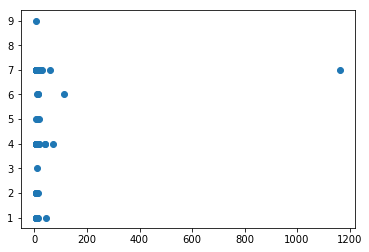

0     1  2         3                                                  4
42     7     7  7  0.285714                           {4: 2, 5: 2, 6: 1, 7: 2}
0   1164  1164  7  0.302405  {1: 150, 2: 169, 3: 44, 4: 223, 5: 116, 6: 84,...
33     8     8  6  0.375000                                 {1: 2, 5: 3, 6: 3}
61     5     5  1  0.400000                           {1: 2, 2: 1, 5: 1, 6: 1}
56     5     5  4  0.400000                                 {1: 2, 3: 1, 4: 2}
52     5     5  7  0.400000                                 {2: 2, 5: 1, 7: 2}
68     5     5  7  0.400000                                 {2: 2, 4: 1, 7: 2}
2     70    70  4  0.400000           {1: 14, 2: 1, 3: 1, 4: 28, 5: 15, 6: 11}
4     44    44  1  0.409091                         {1: 18, 4: 16, 5: 4, 6: 6}
29     9     9  5  0.444444                           {9: 1, 4: 3, 5: 4, 7: 1}
19    13    13  6  0.461538                                 {1: 4, 5: 3, 6: 6}
7     27    27  7  0.481481                   {1: 1, 2: 11, 4: 1, 5: 1, 7: 13}
6     39    39  4  0.487179                               {1: 19, 4: 19, 7: 1}
35     8     8  7  0.500000                                 {3: 2, 5: 2, 7: 4}
48     6     6  2  0.500000                                 {2: 3, 5: 2, 7: 1}
28    10    10  4  0.500000                                       {1: 5, 4: 5}
12    18    18  5  0.500000                           {1: 2, 2: 1, 5: 9, 7: 6}
51     6     6  5  0.500000                                       {1: 3, 5: 3}
25    11    11  4  0.545455                                       {3: 5, 4: 6}
24    11    11  1  0.545455                                 {1: 6, 5: 1, 6: 4}
44     7     7  7  0.571429                                       {3: 3, 7: 4}
40     7     7  1  0.571429                                 {1: 4, 4: 1, 5: 2}
16    14    14  7  0.571429                                       {2: 6, 7: 8}
54     5     5  4  0.600000                                       {4: 3, 5: 2}
55     5     5  4  0.600000                                       {1: 2, 4: 3}
58     5     5  2  0.600000                                       {2: 3, 7: 2}
60     5     5  7  0.600000                                       {5: 2, 7: 3}
34     8     8  2  0.625000                                       {2: 5, 7: 3}
23    11    11  3  0.636364                                       {3: 7, 7: 4}
49     6     6  4  0.666667                                 {1: 1, 3: 1, 4: 4}
..   ...   ... ..       ...                                                ...
31     9     9  7  0.777778                                 {4: 1, 5: 1, 7: 7}
10    19    19  4  0.789474                                      {1: 4, 4: 15}
57     5     5  4  0.800000                                       {4: 4, 7: 1}
53     5     5  4  0.800000                                       {1: 1, 4: 4}
65     5     5  1  0.800000                                       {1: 4, 4: 1}
27    11    11  1  0.818182                                       {1: 9, 4: 2}
21    12    12  7  0.833333                                      {2: 2, 7: 10}
47     6     6  4  0.833333                                       {4: 5, 5: 1}
41     7     7  1  0.857143                                       {1: 6, 4: 1}
43     7     7  1  0.857143                                       {1: 6, 4: 1}
36     8     8  1  0.875000                                       {1: 7, 2: 1}
32     8     8  7  0.875000                                       {2: 1, 7: 7}
37     8     8  7  0.875000                                       {2: 1, 7: 7}
26    11    11  1  0.909091                                      {1: 10, 5: 1}
18    13    13  4  0.923077                                      {1: 1, 4: 12}
5     40    40  4  0.950000                                      {1: 2, 4: 38}
8     23    23  7  0.956522                                      {2: 1, 7: 22}
46     7     7  1  1.000000                                             {1: 7}
45     7     7  7  1.000000                              

In [29]:
cmty_kcore(4)

In [66]:
df.shape,modularity

((83, 4), 0.8398005515615696)